<a href="https://colab.research.google.com/github/eonadler/Colab-Notebooks/blob/main/Week_4_Exploring_N_body_Simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dark Matter & Data Visualization Week 4: Exploring N-body Simulations

This week's notebook starts by demonstrating how an N-body simulation for three gravitating particles (the "three-body problem") can be performed in Python. We then explore how to interact with data from a cosmological dark matter N-body simulation, which we'll work with and visualize in detail later on. Several skills from previous exercies are applied this week, so it may be helpful to refer back to those notebooks!

## Table of Contents:
* [Simulating the Three-body Problem](#first-bullet)
* [Interacting with a Dark Matter Simulation](#second-bullet)
* [Exercise: Measuring the Halo Mass Function](#third-bullet)

## Simulating the Three-body Problem <a name="first-bullet"></a>

The *three-body problem* refers to a system of three point particles interacting under Newton's laws of [gravity](https://en.wikipedia.org/wiki/Newton%27s_law_of_universal_gravitation) and [motion](https://en.wikipedia.org/wiki/Newton%27s_laws_of_motion). It is therefore a special case of the N-body problem, with $N=3$. The three-body problem is famous because, despite its apparent simplicity, no "closed-form" mathematical solution exists; however, the problem can be solved numerically using N-body simulations.

The cells below define the masses, positions, and velocities of the three particles we simulate (for simplicity, we restrict these particles to move in two dimensions). We then define a function to calculate the gravitational acceleration that each particle experiences at a given time, and we use the velocities and accelerations to update positions and velocities at the next timestep. There is no need to understand the details of the calculation, but if you're curious, a derivation is provided [here](https://en.wikipedia.org/wiki/Three-body_problem).

In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.style.use('dark_background')

In [ ]:
def initialize_particles(p1_0,v1_0,p2_0,v2_0,p3_0,v3_0,Nsteps=2500):
  #Define position and velocity arrays
  p1, v1 = np.zeros((Nsteps,2)), np.zeros((Nsteps,2))
  p2, v2 = np.zeros((Nsteps,2)), np.zeros((Nsteps,2))
  p3, v3 = np.zeros((Nsteps,2)), np.zeros((Nsteps,2))

  #Set initial values
  p1[0], p2[0], p3[0] = p1_0, p2_0, p3_0
  v1[0], v2[0], v3[0] = v1_0, v2_0, v3_0

  return p1, v1, p2, v2, p3, v3

def get_acceleration(p1,p2,m):
  #Calculate gravitational acceleration
	displacement = p1-p2
	acceleration = -1.*m*displacement/((np.sqrt(np.sum(displacement**2,axis=0)))**(3./2.))
	return acceleration

def evolve(p1,v1,m1,p2,v2,m2,p3,v3,m3,dt=0.01,Nsteps=2500):
  #Loop over timesteps
  for i in range(Nsteps-1):
    dv1 = get_acceleration(p1[i],p2[i],m2) + get_acceleration(p1[i],p3[i],m3)
    dv2 = get_acceleration(p2[i],p1[i],m1) + get_acceleration(p2[i],p3[i],m3)
    dv3 = get_acceleration(p3[i],p1[i],m1) + get_acceleration(p3[i],p2[i],m2)

    #Update velocities, then positions
    v1[i + 1] = v1[i] + dv1*dt
    v2[i + 1] = v2[i] + dv2*dt
    v3[i + 1] = v3[i] + dv3*dt

    p1[i + 1] = p1[i] + v1[i]*dt
    p2[i + 1] = p2[i] + v2[i]*dt
    p3[i + 1] = p3[i] + v3[i]*dt

  return p1, p2, p3

In [ ]:
#Set particle masses
m1 = 3
m2 = 6
m3 = 9

#Set initial positions and velocities
p1_0 = np.array([3., 1.])
v1_0 = np.array([-4, 1.])

p2_0 = np.array([1., 6.])
v2_0 = np.array([1., -0.1])

p3_0 = np.array([1., 1.])
v3_0 = np.array([4., 0.])

p1, v1, p2, v2, p3, v3 = initialize_particles(p1_0,v1_0,p2_0,v2_0,p3_0,v3_0)
p1, p2, p3 = evolve(p1,v1,m1,p2,v2,m2,p3,v3,m3)

Finally, let's plot the evolution of the three bodies over time. The large transparent markers show the initial positions, and the large solid markers show the final positions.

<ipython-input-7-79e98bb6e7c7>:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "^" (-> marker='^'). The keyword argument will take precedence.
  plt.plot(p1[0][0], p1[0][1], '^', color='orange', marker='o', markersize = 10, alpha=0.5)
<ipython-input-7-79e98bb6e7c7>:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "^" (-> marker='^'). The keyword argument will take precedence.
  plt.plot(p1[-1][0], p1[-1][1], '^', color='orange', marker='o', markersize = 10, alpha=1)
<ipython-input-7-79e98bb6e7c7>:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "^" (-> marker='^'). The keyword argument will take precedence.
  plt.plot(p2[0][0], p2[0][1], '^', color='white', marker='o', markersize = 10, alpha=0.5)
<ipython-input-7-79e98bb6e7c7>:12: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "^" (-> marker=

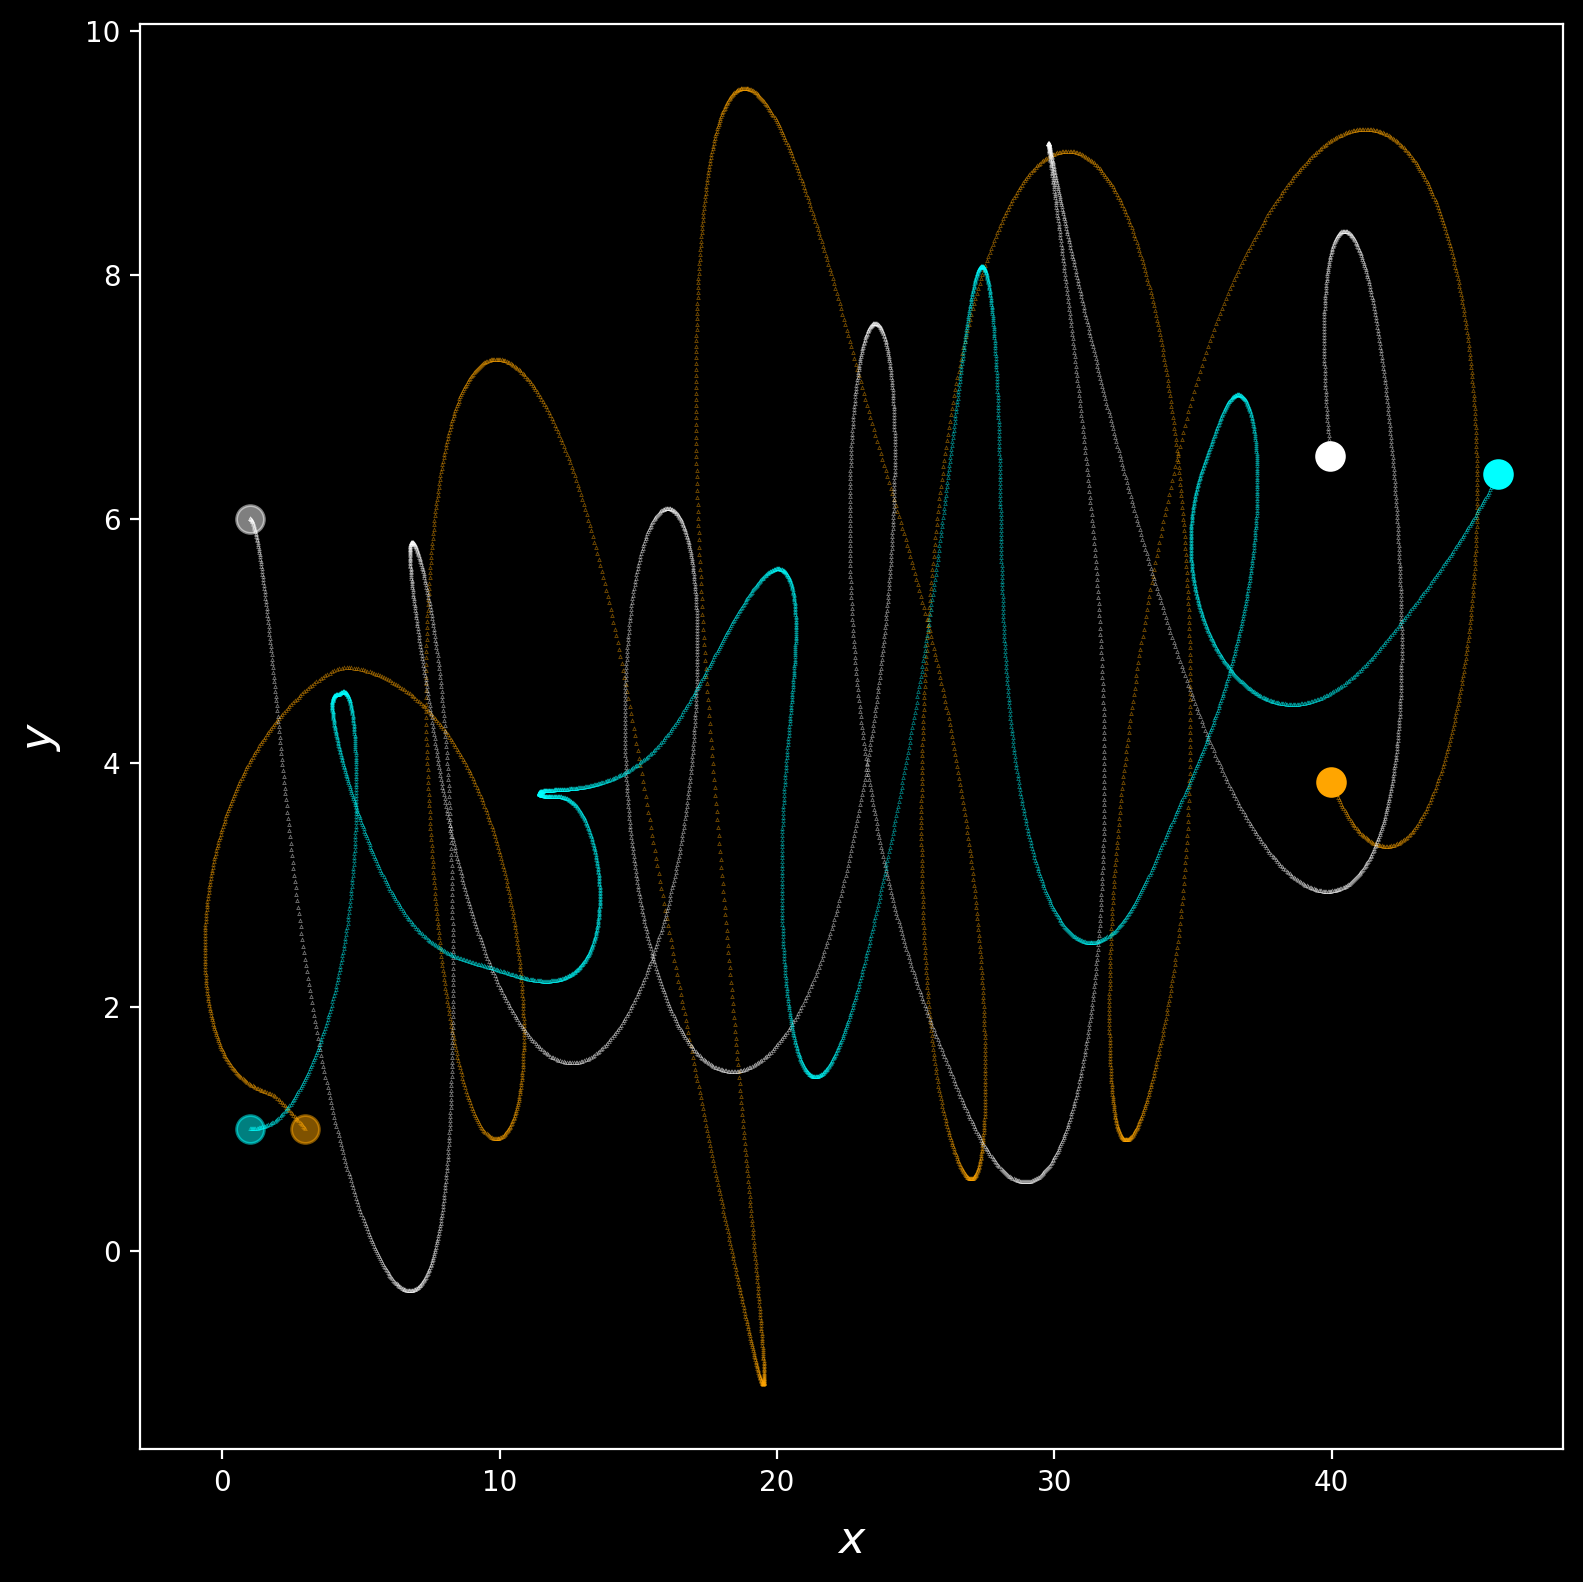

In [ ]:
#Visualize evolution
fig = plt.figure(figsize=(8, 8))

plt.plot([i[0] for i in p1], [j[1] for j in p1], '^', color='orange', markersize = 0.01, alpha=0.5)
plt.plot([i[0] for i in p2], [j[1] for j in p2], '^', color='white', markersize = 0.01, alpha=0.5)
plt.plot([i[0] for i in p3], [j[1] for j in p3], '^', color='cyan', markersize = 0.01, alpha=0.5)

plt.plot(p1[0][0], p1[0][1], '^', color='orange', marker='o', markersize = 10, alpha=0.5)
plt.plot(p1[-1][0], p1[-1][1], '^', color='orange', marker='o', markersize = 10, alpha=1)

plt.plot(p2[0][0], p2[0][1], '^', color='white', marker='o', markersize = 10, alpha=0.5)
plt.plot(p2[-1][0], p2[-1][1], '^', color='white', marker='o', markersize = 10, alpha=1)

plt.plot(p3[0][0], p3[0][1], '^', color='cyan', marker='o', markersize = 10, alpha=0.5)
plt.plot(p3[-1][0], p3[-1][1], '^', color='cyan', marker='o', markersize = 10, alpha=1)

plt.xlabel(r'$x$',fontsize=16,labelpad=8)
plt.ylabel(r'$y$',fontsize=16,labelpad=8)

#Show the plot (you might need to run this twice if there's a white border around the plot)
plt.tight_layout()
plt.show()

In [ ]:
z_arr = np.zeros((2500,1))

In [ ]:
pos1 = np.hstack([p1, z_arr])
pos2 = np.hstack([p2, z_arr])
pos3 = np.hstack([p3, z_arr])

In [ ]:
positions = np.array([pos1, pos2, pos3])

In [ ]:
np.shape(positions)
# particles, timesteps, 3 = xyz

(3, 2500, 3)

In [ ]:
import h5py

In [ ]:
#Save positions and colors into an HDF5 file
f = h5py.File("ethan_3body.h5", 'w')
position_dset = f.create_dataset("positions", data=positions*0.1)
#color_dset = f.create_dataset("colors", data=your_colors)
f.close()

**Exercise.** Copy the "Set particle masses" and "Visualize evolution" cells below. Change some of the masses, initial positions, and initial velocities. Then, evolve the system and visualize its evolution.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Your parameter setting code here!

In [ ]:
#Your visualization code here!

## Interacting with a Dark Matter Simulation <a name="second-bullet"></a>

Next, let's load and explore data from a cosmological dark matter simulation. This is essentially an N-body simulation in an expanding universe; the simulation below contains $2048^3$ (or $\approx 8.6$ billion) particles and covers a volume of $\approx 5.7$ million cubic Megaparsecs, or $\approx 18$ trillion cubic lightyears. Each dark matter particle in this simulation has a mass of roughly $10$ million suns. This is much larger than we expect the mass of actual dark matter particles to be; instead, these simulation particles represent large groups of dark matter particles. The "cosmological parameters" that govern this simulation, including the amounts of dark matter and dark energy and the expansion rate of the universe, are chosen to match current observations.

As we saw in class, dark matter clumps into systems referred to as "halos." The cell below loads an array of all dark matter halos above a mass threshold from the simulation; each element of the array corresponds to a single halo and contains several halo properties.

In [ ]:
!wget https://github.com/usc-cosmolab/hackspace/blob/master/data/halos_short.bin?raw=true -O halos_short.bin

#Load halos from cosmological simulation
with open(r"halos_short.bin", "rb") as f:
    halos = pickle.load(f, encoding='latin1')

--2024-02-01 19:11:42--  https://github.com/usc-cosmolab/hackspace/blob/master/data/halos_short.bin?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/usc-cosmolab/hackspace/raw/master/data/halos_short.bin [following]
--2024-02-01 19:11:42--  https://github.com/usc-cosmolab/hackspace/raw/master/data/halos_short.bin
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/usc-cosmolab/hackspace/master/data/halos_short.bin [following]
--2024-02-01 19:11:43--  https://raw.githubusercontent.com/usc-cosmolab/hackspace/master/data/halos_short.bin
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443..

In [ ]:
#Notes on some halo properties:
# - ```'mvir'```: halo mass in solar masses
# - ```'rvir'```: halo radius in kiloparsecs
# - ```'x','y','z'```: position in Megaparsecs
# - ```'vx','vy','vz'```: velocity in kilometers/second

print('There are {} halos above the mass threshold in this simulation.'.format(len(halos)))
print('\n')

print('The halos array looks like this:\n')
print(halos)
print('\n')

print('The halos have the following properties:\n')
print(halos.dtype)
print('\n')

print('The mass of the first halo can be accessed like this:\n')
print(halos[0]['mvir'])
print('\n')

print('The masses of all halos can be accessed like this:\n')
print(halos['mvir'])

There are 69614 halos above the mass threshold in this simulation.


The halos array looks like this:

[(1., 1522994752, -1, -1, 3.8200e+13, 691.869019, 550.349976, 584.950012, 3.8200e+13,   4.19298,   6.5394 ,   5.05556, 109.238998, -217.13,  -51.36,  -67.45, 0.87741)
 (1., 1524657349, -1, -1, 3.0180e+13, 639.598999, 543.960022, 543.960022, 3.0180e+13,  15.98241,   0.35052,   6.54042,  74.883003,  -91.11,  269.91, -154.58, 0.79022)
 (1., 1523016973, -1, -1, 2.8207e+13, 625.348022, 485.829987, 504.459991, 2.8207e+13,   0.87289,   0.47321,  10.07503,  96.148003,   48.92,   99.11,  141.78, 0.49341)
 ...
 (1., 1536300972, -1, -1, 1.0055e+11,  95.528   ,  98.57    , 100.900002, 1.0055e+11, 117.24198, 106.13021, 110.94493,   4.204   ,  -69.32, -201.79, -160.75, 0.29238)
 (1., 1536494842, -1, -1, 1.0041e+11,  95.482002,  79.400002,  81.660004, 1.0041e+11, 115.97246, 115.68816, 121.08279,  10.661   ,   45.48,   15.08,   55.67, 0.64098)
 (1., 1536300802, -1, -1, 1.0037e+11,  95.470001,  82.75 

Next, let's visualize how halos are distributed in the simulation volume:

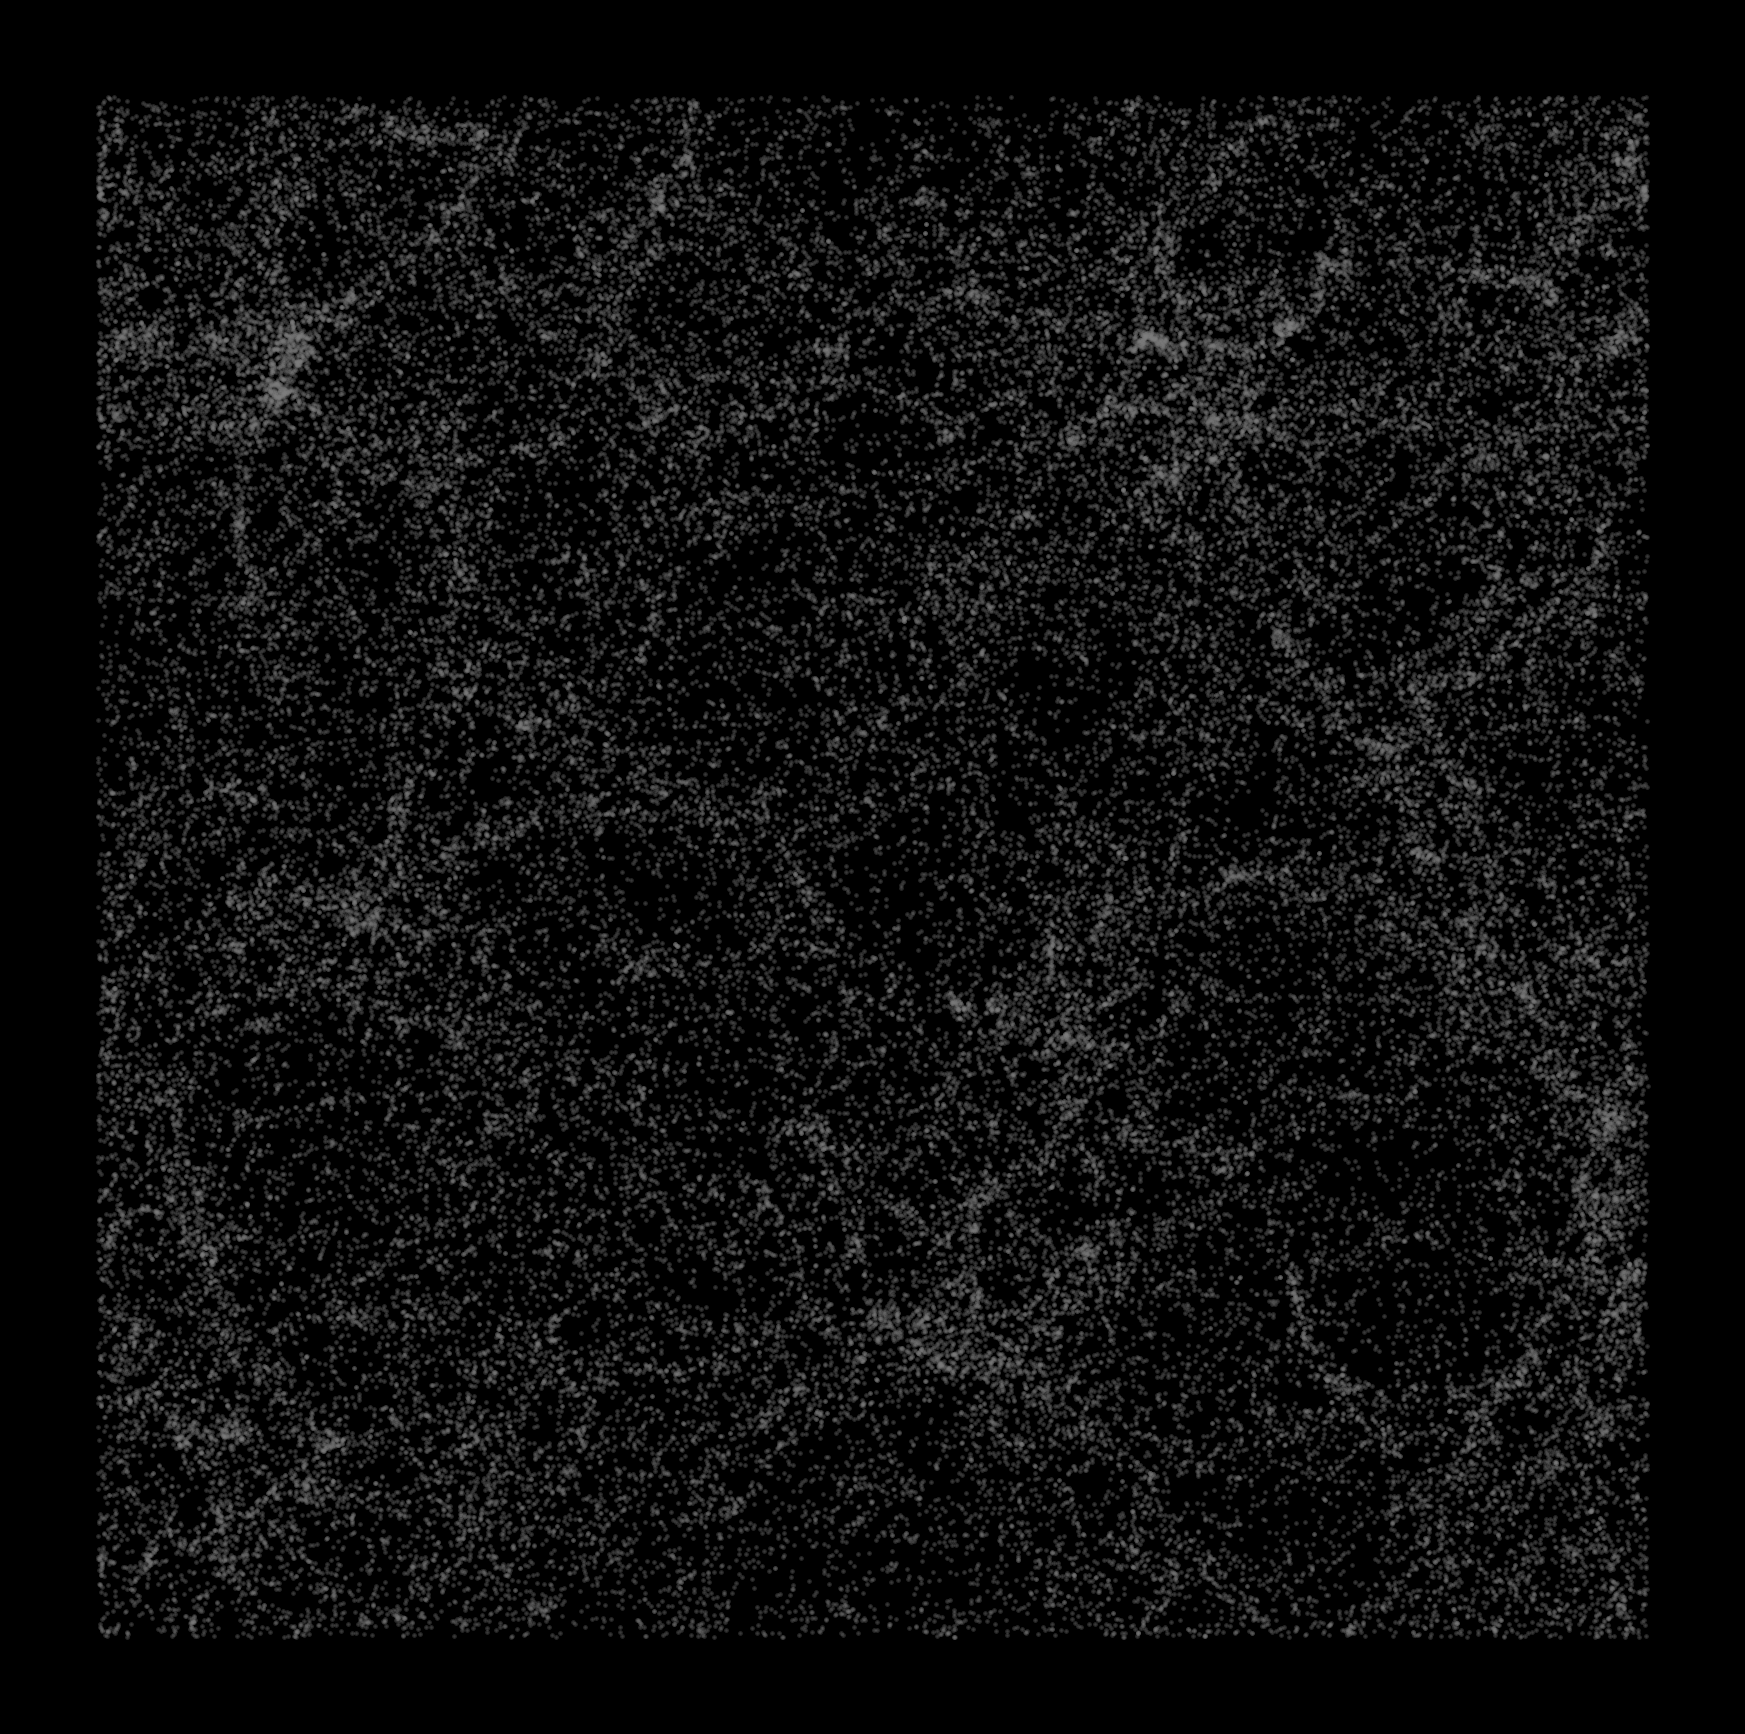

In [ ]:
#Visualize cosmic web of halos
plt.figure(figsize=(11,11))

plt.scatter(halos['x'],halos['y'],c='gray',s=0.5,alpha=0.3)

plt.axis('off')
plt.show()

## Exercise: Measuring the Halo Mass Function <a name="third-bullet"></a>

**Exercise.** To become more familiar with the halos from this simulation, we'll measure a key quantity known as the *halo mass function*, or the number of halos as a function of mass. To do so, define an array that contains all halo masses, and plot the mass distribution using `plt.hist`.

After plotting, write down a few things you notice about the halo mass function. For example, are there more low-mass or high-mass halos in the simulation? Why do you think this is?

*Hint: Halo masses are very large numbers in the units we're using, so consider measuring them or plotting them on logarithmic axes.*

In [ ]:
#Your code here!